# A GxE study in mouse

## 2021-03-14

Client wants to conduct a 2x2 factorial experiment in mice.  The two factors are strain (C57BL/6J and DBA/2J), and diet (chow and high fat).  The outcome of interest is insulin levels measured in the serum.  The client wants to know how many mice they should have in each group, and how the data should be analyzed.  The client has plans to collect data with many more strains, and a more diverse array of metabolites.

## Power and detectable effect functions

In [1]:
using Plots
using Distributions
using Random
using Optim

Functions for power and minimum detectable effect for standard normal.

In [2]:
function detectable(β=0.8,α=0.05)
    res = optimize( x-> abs( power(x,α) - β ), 0,10 )
    res.minimizer
end

detectable (generic function with 3 methods)

In [3]:
function power(μ=0.0,α=0.05)
    z = quantile(Normal(),1-α/2)
    return ccdf(Normal(μ,1),z) + cdf(Normal(μ,1),-z) 
end

power (generic function with 3 methods)

## Visualizing power 

In [9]:
# Power calculations for a normally distributed outcome
# null mean
μ0 = 0.0
# alternative mean
μ1 = 0.1
# standard deviation
σ = 1/20
# level of significance, alpha
α = 0.05;

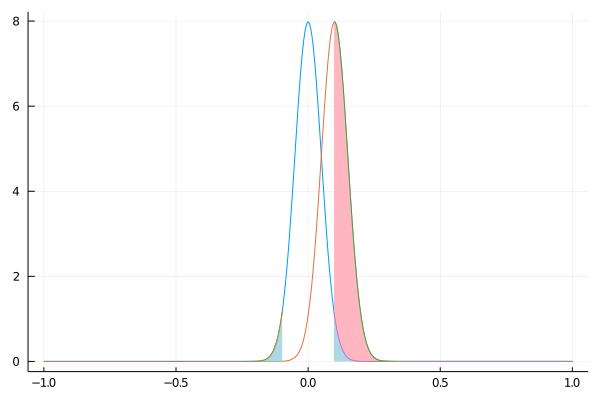

In [10]:
# upper and lower cutoffs for test 
zhi = quantile( Normal(μ0,σ), 1-α/2 )
zlo = quantile( Normal(μ0,σ), α/2 )
# plot null pdf
plot(x-> pdf(Normal(μ0,σ),x),-1,1,legend=false)
# alt pdf
plot!(x-> pdf(Normal(μ1,σ),x),-1,1)
# shade area in critical region under alt
plot!(x-> pdf(Normal(μ1,σ),x), zhi, 1.0, 
    fill=(0,:lightpink))
# shade area in critical region under null
plot!(x-> pdf(Normal(μ0,σ),x), zhi, 1.0, 
    fill=(0,:lightblue))
plot!(x-> pdf(Normal(μ0,σ),x), -1.0, zlo, 
    fill=(0,:lightblue))

## Statistical considerations

### Study design

The study has a randomized 2x2 factorial structure.  The two factors are strain (C57BL/6J, b and DBA/2J, d), and diet (chow, c and high fat, h).

| strain / diet | chow | high fat |
| ------------- |:----:|:--------:|
| C57BL/6J      |  bc  | bh       |
| DBA/2J        |  dc  | dh       |

| Effect | Formula in terms of group means |
| ------ |:---------------------------------------:|
| Main effect of strain | $\frac{1}{2}( dh + dc - bh - bc )$ |
| Main effect diet | $\frac{1}{2}( dh - dc + dh - bc)$ |
| Interaction effect | $\frac{1}{2}( dh - dc - dh + bc )$ |

### Analysis plan

The primary analysis will estimate the main effect of strain, main effect of diet, and the interaction effect between them.  We will use 5% tests of significance ($\alpha=0.05$) for statistical significance.  A secondary analysis will be performed using linear regression with the factorial effects as the primary predictors, and adjusting for potential confounders that may explain some of the residual variance.

### Sample size considerations

If we have $n$ animals in each of the four groups, then the variance of each group mean is $1/n$, assuming that the residual standard deviation is 1.  It follows that the variance of each main effect and interaction as defined in the formula above is also $1/n$ (the variance of the sum/difference is $4/n$, and we have to divide that by 4 because of the multiplier $1/2$).  Thus, we can now plot the detectable effect size as a function of the number of animals in each treatment combination group.

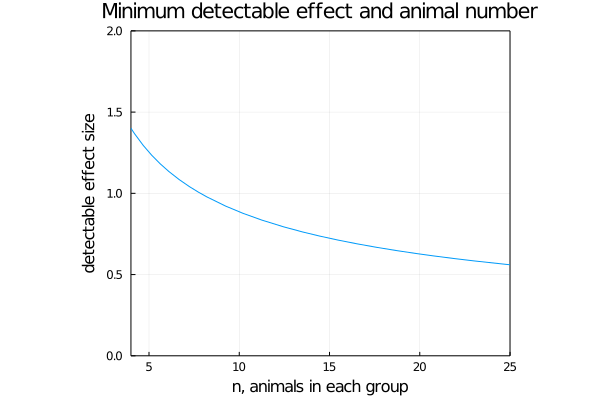

In [11]:
plot( n -> detectable()*sqrt(1/n),4,25,
    xlim=(4,25),ylim=(0,2),
    framestyle=:box,legend=false,#label="minimum detectable effect",
     aspectratio=9,
    xlab="n, animals in each group",ylab="detectable effect size",
    title="Minimum detectable effect and animal number")


With about 8 mice in each group (32 total), we will have a detectable effect size of about 1 standard deviation for each factorial (main and interaction) effect.